# Tutorial Implementasi Linear Regression

## Daftar Isi:
1. Pengenalan Linear Regression
2. Persiapan Data dan Library
3. Implementasi Linear Regression dari Awal (Scratch)
4. Implementasi dengan Scikit-learn
5. Evaluasi Model
6. Visualisasi Hasil
7. Studi Kasus: Prediksi Harga Rumah
8. Latihan Mandiri

## 1. Pengenalan Linear Regression

Linear Regression adalah algoritma machine learning yang digunakan untuk memprediksi nilai kontinu berdasarkan satu atau lebih variabel independen. Model ini mencoba menemukan hubungan linear antara variabel input (X) dan output (y).

### Rumus Dasar:
\[ y = mx + b \]
dimana:
- y = variabel dependen (target)
- m = slope (kemiringan)
- x = variabel independen (fitur)
- b = intercept (titik potong)

In [7]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed untuk reproducibility
np.random.seed(42)

# Mengatur style plot
plt.style.use('seaborn-v0_8')
%matplotlib inline

## 2. Membuat Data Contoh

Kita akan membuat dataset sederhana untuk memahami konsep Linear Regression. Dataset ini akan memiliki hubungan linear dengan sedikit noise untuk mensimulasikan data dunia nyata.

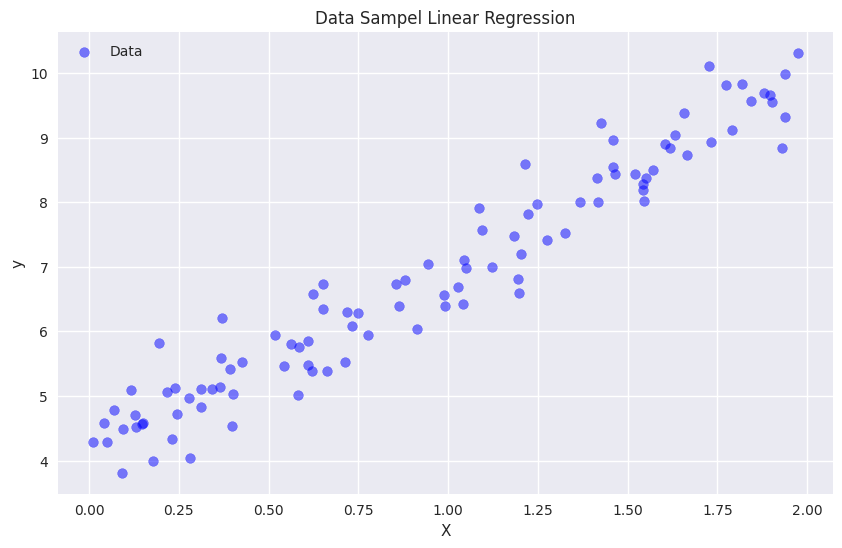

Bentuk data:
X shape: (100, 1)
y shape: (100, 1)


In [9]:
# Membuat data sampel
X = 2 * np.random.rand(100, 1)  # 100 sampel dengan 1 fitur
y = 4 + 3 * X + np.random.randn(100, 1) * 0.5  # y = 4 + 3x + noise

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Sampel Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

print("Bentuk data:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

## 3. Implementasi Linear Regression dari Awal (Scratch)

Kita akan mengimplementasikan Linear Regression dari awal menggunakan Gradient Descent. Ini akan membantu kita memahami cara kerja algoritma secara mendalam.

### Langkah-langkah implementasi:
1. Inisialisasi parameter (weights dan bias)
2. Implementasi fungsi prediksi
3. Implementasi fungsi cost (Mean Squared Error)
4. Implementasi Gradient Descent
5. Training model

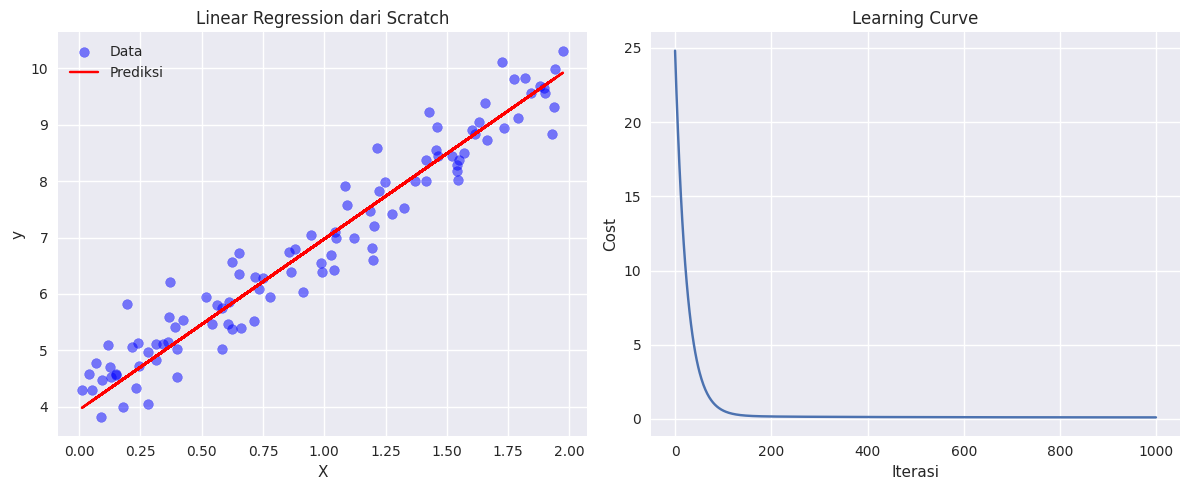

Parameter model yang ditemukan:
Weights: 3.0267
Bias: 3.9472


In [10]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def fit(self, X, y):
        # Inisialisasi parameter
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            # Forward pass
            y_predicted = self.predict(X)
            
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store cost
            cost = self._compute_cost(y_predicted, y)
            self.cost_history.append(cost)
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def _compute_cost(self, y_predicted, y):
        n_samples = y.shape[0]
        return (1/(2*n_samples)) * np.sum((y_predicted - y)**2)

# Training model dari scratch
model_scratch = LinearRegressionScratch(learning_rate=0.01, n_iterations=1000)
model_scratch.fit(X, y)

# Visualisasi hasil
plt.figure(figsize=(12, 5))

# Plot data dan garis regresi
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.plot(X, model_scratch.predict(X), color='red', label='Prediksi')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression dari Scratch')
plt.legend()
plt.grid(True)

# Plot learning curve
plt.subplot(1, 2, 2)
plt.plot(model_scratch.cost_history)
plt.xlabel('Iterasi')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Parameter model yang ditemukan:")
print(f"Weights: {model_scratch.weights[0][0]:.4f}")
print(f"Bias: {model_scratch.bias[0] if isinstance(model_scratch.bias, np.ndarray) else model_scratch.bias:.4f}")

## 4. Implementasi dengan Scikit-learn

Sekarang kita akan menggunakan implementasi Linear Regression dari library scikit-learn untuk membandingkan hasilnya dengan implementasi kita sebelumnya.

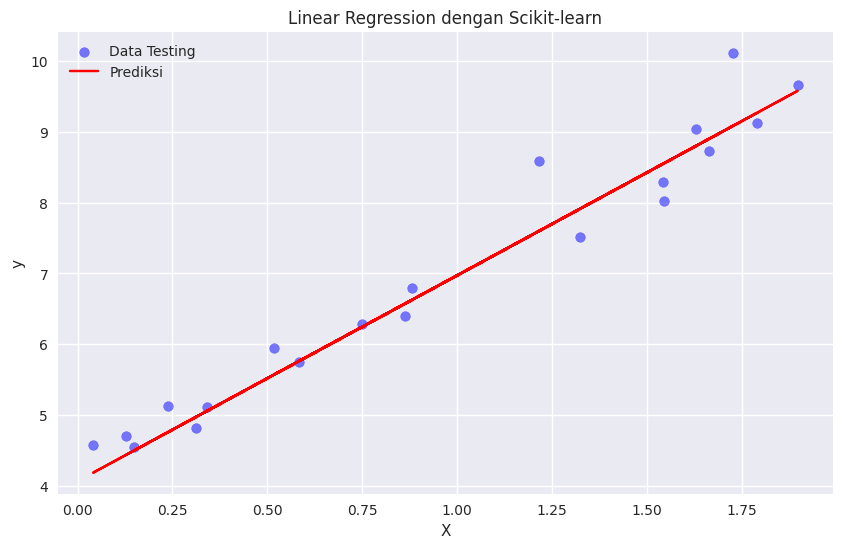


Hasil Evaluasi Model Scikit-learn:
Mean Squared Error: 0.1634
R² Score: 0.9507
Coefficient (Weight): 2.8997
Intercept (Bias): 4.0715


In [11]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Membuat prediksi
y_pred = model_sklearn.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data Testing')
plt.plot(X_test, y_pred, color='red', label='Prediksi')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression dengan Scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

print("\nHasil Evaluasi Model Scikit-learn:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Coefficient (Weight): {model_sklearn.coef_[0][0]:.4f}")
print(f"Intercept (Bias): {model_sklearn.intercept_[0]:.4f}")

In [12]:
print("\nParameter Model Scikit-learn:")
print(f"Coefficient (Weight): {model_sklearn.coef_[0][0]:.4f}")
print(f"Intercept (Bias): {model_sklearn.intercept_[0]:.4f}")


Parameter Model Scikit-learn:
Coefficient (Weight): 2.8997
Intercept (Bias): 4.0715


## 5. Studi Kasus: Prediksi Harga Rumah

Sekarang kita akan mengaplikasikan Linear Regression pada kasus yang lebih realistis: memprediksi harga rumah berdasarkan beberapa fitur.

Sample data:
   Luas_Tanah  Jumlah_Kamar  Jarak_ke_Pusat          Harga
0  100.260038             2        3.601707  204150.213997
1  129.070682             1        4.982366  275216.326979
2   94.706863             4        0.819965  422091.805452
3  154.403383             3        8.540863  304524.533854
4  112.513347             4        4.381815  336654.481347

Statistik deskriptif:
       Luas_Tanah  Jumlah_Kamar  Jarak_ke_Pusat          Harga
count  100.000000    100.000000      100.000000     100.000000
mean   100.737470      3.040000        5.297269  243204.639771
std     21.947262      1.476551        2.050702  107951.549173
min     35.174653      1.000000        0.095471   22834.542228
25%     85.180374      2.000000        4.314936  172503.481835
50%    101.224887      3.000000        5.403957  241559.703696
75%    113.625267      4.000000        6.759770  303793.218523
max    177.054630      5.000000        9.551523  579051.880197


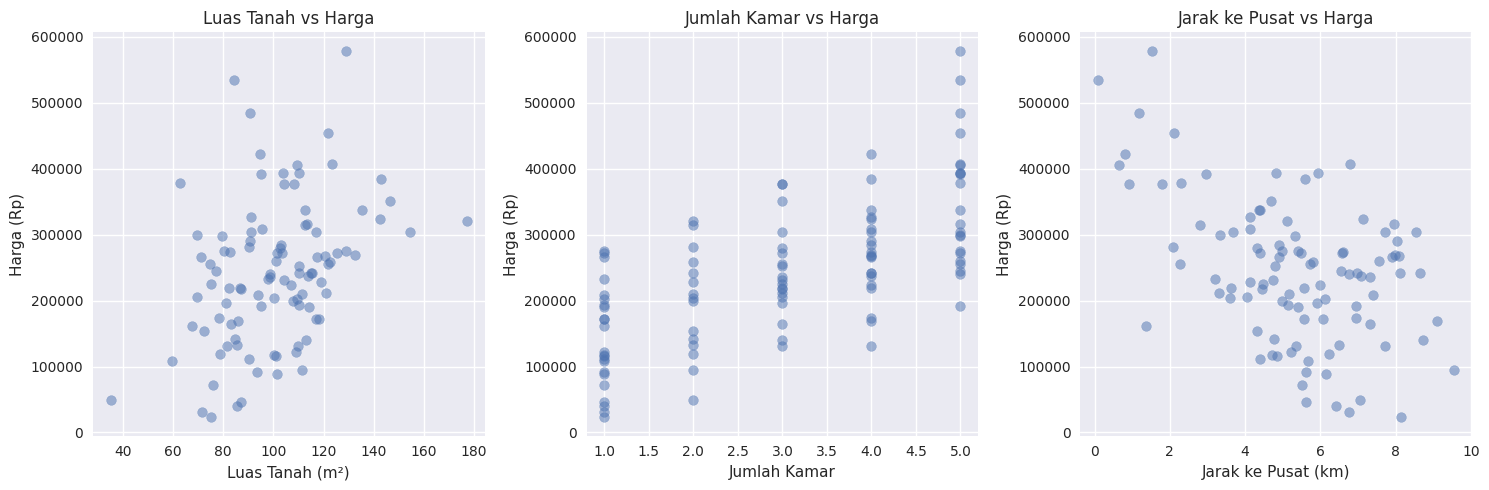


Hasil Evaluasi Model:
Mean Squared Error: 1,878,491,106.36
R² Score: 0.4617

Koefisien model:
Luas_Tanah: Rp 1,974.00
Jumlah_Kamar: Rp 45,705.06
Jarak_ke_Pusat: Rp -27,013.01
Intercept: Rp 43,639.59

Prediksi harga untuk rumah contoh:
Luas Tanah: 120 m²
Jumlah Kamar: 3
Jarak ke Pusat: 4 km
Prediksi Harga: Rp 309,582.75


In [13]:
# Membuat dataset harga rumah sederhana
n_samples = 100

# Fitur-fitur
luas_tanah = np.random.normal(100, 20, n_samples)
jumlah_kamar = np.random.randint(1, 6, n_samples)
jarak_ke_pusat = np.random.normal(5, 2, n_samples)

# Membuat target (harga) dengan noise
harga = (
    2000 * luas_tanah +  # Rp 2 juta per meter persegi
    50000 * jumlah_kamar +  # Rp 50 juta per kamar
    -20000 * jarak_ke_pusat +  # Pengurangan Rp 20 juta per km dari pusat
    np.random.normal(0, 50000, n_samples)  # Noise
)

# Membuat DataFrame
data = pd.DataFrame({
    'Luas_Tanah': luas_tanah,
    'Jumlah_Kamar': jumlah_kamar,
    'Jarak_ke_Pusat': jarak_ke_pusat,
    'Harga': harga
})

# Tampilkan beberapa data pertama
print("Sample data:")
print(data.head())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(data.describe())

# Visualisasi hubungan antar variabel
plt.figure(figsize=(15, 5))

# Plot 1: Luas Tanah vs Harga
plt.subplot(1, 3, 1)
plt.scatter(data['Luas_Tanah'], data['Harga'], alpha=0.5)
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga (Rp)')
plt.title('Luas Tanah vs Harga')

# Plot 2: Jumlah Kamar vs Harga
plt.subplot(1, 3, 2)
plt.scatter(data['Jumlah_Kamar'], data['Harga'], alpha=0.5)
plt.xlabel('Jumlah Kamar')
plt.ylabel('Harga (Rp)')
plt.title('Jumlah Kamar vs Harga')

# Plot 3: Jarak ke Pusat vs Harga
plt.subplot(1, 3, 3)
plt.scatter(data['Jarak_ke_Pusat'], data['Harga'], alpha=0.5)
plt.xlabel('Jarak ke Pusat (km)')
plt.ylabel('Harga (Rp)')
plt.title('Jarak ke Pusat vs Harga')

plt.tight_layout()
plt.show()

# Persiapkan data untuk model
X = data[['Luas_Tanah', 'Jumlah_Kamar', 'Jarak_ke_Pusat']]
y = data['Harga']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nHasil Evaluasi Model:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"R² Score: {r2:.4f}")

print("\nKoefisien model:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: Rp {coef:,.2f}")
print(f"Intercept: Rp {model.intercept_:,.2f}")

# Contoh prediksi
contoh_rumah = pd.DataFrame({
    'Luas_Tanah': [120],
    'Jumlah_Kamar': [3],
    'Jarak_ke_Pusat': [4]
})

prediksi_harga = model.predict(contoh_rumah)
print(f"\nPrediksi harga untuk rumah contoh:")
print(f"Luas Tanah: 120 m²")
print(f"Jumlah Kamar: 3")
print(f"Jarak ke Pusat: 4 km")
print(f"Prediksi Harga: Rp {prediksi_harga[0]:,.2f}")

## 6. Latihan Mandiri

Sekarang saatnya Anda untuk mencoba mengimplementasikan Linear Regression sendiri. Berikut adalah beberapa latihan yang bisa Anda coba:

### Latihan 1: Prediksi Nilai Siswa
Buatlah model Linear Regression untuk memprediksi nilai ujian akhir berdasarkan:
- Jam belajar per minggu
- Nilai tugas
- Kehadiran (dalam persen)

### Latihan 2: Prediksi Konsumsi Bahan Bakar
Buat model untuk memprediksi konsumsi bahan bakar mobil (km/l) berdasarkan:
- Kecepatan rata-rata
- Jarak tempuh
- Usia mobil
- Kapasitas mesin

### Latihan 3: Analisis Penjualan
Buat model untuk memprediksi penjualan bulanan berdasarkan:
- Budget iklan
- Jumlah promosi
- Seasonality (1-12 untuk bulan)
- Harga produk

### Tips Mengerjakan Latihan:
1. Mulai dengan membuat data dummy yang masuk akal
2. Lakukan eksplorasi data dan visualisasi
3. Split data menjadi training dan testing
4. Evaluasi model dengan metrik yang sesuai
5. Interpretasikan hasil dan koefisien model

Selamat berlatih! 🚀

## Kesimpulan

Dalam tutorial ini, kita telah mempelajari:

1. **Konsep Dasar Linear Regression**
   - Rumus dasar dan komponen
   - Cara kerja algoritma

2. **Implementasi dari Awal (Scratch)**
   - Gradient Descent
   - Perhitungan cost function
   - Update parameter

3. **Implementasi dengan Scikit-learn**
   - Penggunaan library
   - Perbandingan hasil

4. **Studi Kasus Praktis**
   - Prediksi harga rumah
   - Analisis multiple features
   - Interpretasi model

5. **Best Practices**
   - Data preprocessing
   - Feature selection
   - Model evaluation
   - Interpretasi hasil

Linear Regression adalah fondasi penting dalam machine learning dan dapat digunakan untuk berbagai aplikasi prediksi nilai kontinu. Pemahaman yang baik tentang algoritma ini akan membantu Anda dalam mempelajari algoritma machine learning yang lebih kompleks.